In [1]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
data = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data.drop('car_ID', axis=1, inplace=True)

In [5]:
data.shape

(205, 25)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [7]:
data.isna().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [8]:
data.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [9]:
data.describe(include=object)

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [10]:
numeric_columns = data.loc[:, data.dtypes!=np.object].columns
category_columns = data.loc[:, data.dtypes==np.object].columns

In [11]:
def column_info(df_column):
    import matplotlib.pyplot as plt 
    print('---------------NaN-------------------')
    print(f'Values of NaN in column {df_column.isna().sum() * 100 / df_column.shape[0]} % \n')

    print('---------------describe-------------------')
    print(f'{df_column.describe()} \n')

    print('---------------value_counts------------------')
    print(f'Unique number of value - {df_column.nunique()} \n')

    print('------------------7 max values-----------------')
    print(f'{df_column.sort_values(ascending=False).head(7)} \n')

    print('------------------7 min values-----------------')
    print(f'{df_column.dropna().sort_values(ascending=False).tail(7)} \n')

    print('-----------------------------------------')
#     plt.figure(figsize=(16, 10))

#     plt.subplot(1,2,1)
#     plt.title(f'{df_column.name} Distribution Plot')
#     sns.distplot(df_column)

#     plt.subplot(1,2,2)
#     plt.title(f'{df_column.name} Car Price Spread')
#     sns.boxplot(y=df_column)

#     plt.show()
    None

In [12]:
numeric_columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

---------------NaN-------------------
Values of NaN in column 0.0 % 

---------------describe-------------------
count    205.000000
mean       0.834146
std        1.245307
min       -2.000000
25%        0.000000
50%        1.000000
75%        2.000000
max        3.000000
Name: symboling, dtype: float64 

---------------value_counts------------------
Unique number of value - 6 

------------------7 max values-----------------
0      3
29     3
178    3
55     3
56     3
57     3
58     3
Name: symboling, dtype: int64 

------------------7 min values-----------------
180   -1
174   -1
175   -1
204   -1
194   -2
196   -2
198   -2
Name: symboling, dtype: int64 

-----------------------------------------


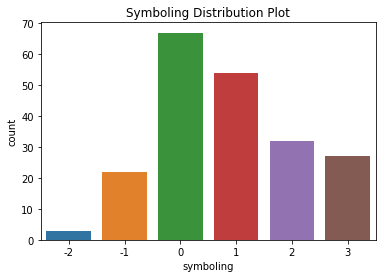

In [13]:
    column_info(data['symboling'])

    plt.title(f'Symboling Distribution Plot')
    sns.countplot(data['symboling'])
    
    plt.show()

---------------NaN-------------------
Values of NaN in column 0.0 % 

---------------describe-------------------
count    205.000000
mean      98.756585
std        6.021776
min       86.600000
25%       94.500000
50%       97.000000
75%      102.400000
max      120.900000
Name: wheelbase, dtype: float64 

---------------value_counts------------------
Unique number of value - 53 

------------------7 max values-----------------
73     120.9
71     115.6
70     115.6
114    114.2
113    114.2
110    114.2
109    114.2
Name: wheelbase, dtype: float64 

------------------7 min values-----------------
127    89.5
126    89.5
1      88.6
0      88.6
18     88.4
30     86.6
31     86.6
Name: wheelbase, dtype: float64 

-----------------------------------------


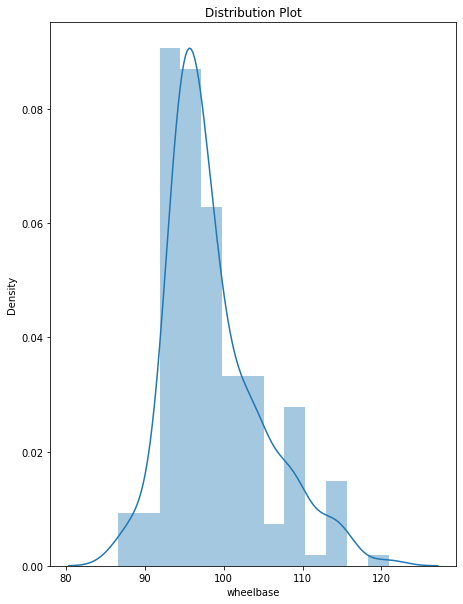

In [14]:
    column_info(data['wheelbase'])
    
    plt.figure(figsize=(16, 10))

    plt.subplot(1,2,1)
    plt.title(f'Distribution Plot')
    sns.distplot(data['wheelbase'])
    plt.show()

In [15]:
numeric_columns

Index(['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

---------------NaN-------------------
Values of NaN in column 0.0 % 

---------------describe-------------------
count    205.000000
mean     174.049268
std       12.337289
min      141.100000
25%      166.300000
50%      173.200000
75%      183.100000
max      208.100000
Name: carlength, dtype: float64 

---------------value_counts------------------
Unique number of value - 75 

------------------7 max values-----------------
73     208.1
70     202.6
71     202.6
48     199.6
47     199.6
74     199.2
109    198.9
Name: carlength, dtype: float64 

------------------7 min values-----------------
45    155.9
34    150.0
33    150.0
32    150.0
31    144.6
30    144.6
18    141.1
Name: carlength, dtype: float64 

-----------------------------------------


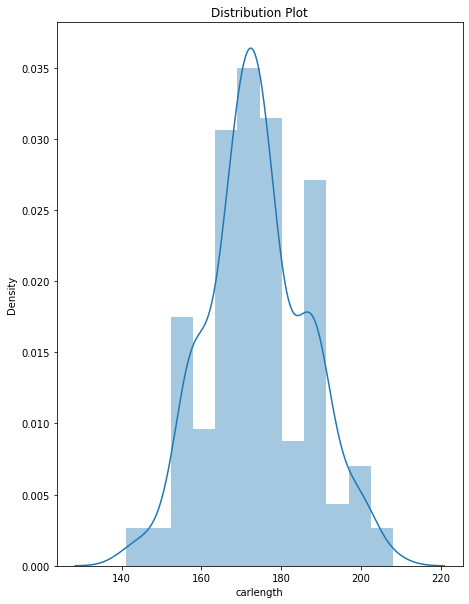

In [16]:
column_info(data['carlength'])

plt.figure(figsize=(16, 10))

plt.subplot(1,2,1)
plt.title(f'Distribution Plot')
sns.distplot(data['carlength'])
plt.show()